## Imports

In [2]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [3]:
%autosave 180

Autosaving every 180 seconds


## Generate the dataset

In [4]:
df = pd.DataFrame(np.random.randint(0, 2, size=(30, 8)), columns=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8'])
df['y'] = df.sum(axis=1)
df

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,1,1,0,1,1,1,0,0,5
1,0,1,0,0,1,1,1,1,5
2,1,0,1,0,0,1,0,1,4
3,1,1,0,1,1,1,1,1,7
4,0,1,0,0,1,0,1,1,4
5,0,0,0,1,1,1,1,0,4
6,0,0,0,0,1,1,0,1,3
7,0,0,1,0,1,0,1,0,3
8,1,1,0,0,0,0,0,1,3
9,1,0,0,0,0,1,0,0,2


## Adder with the Elman Recurrent Neural Network

We'll build an Elman Recurrent Neural Network to predict the sum of 8 bits. We have one neuron that has two inputs : the input bit $x_{n}$ and the previous output $f_{t-1}$.

As we want to have a linear model, the activation function will be the identity, and we don't need a bias.

<img src="archi.png">

In [5]:
class RNNAdder():
    
    def __init__(self):
        # Our two weights initialized randomly between -1 and 1
        self.Vx = np.random.normal(1.0, 0.5)
        self.Vf = np.random.normal(1.0, 0.5)
        
        # Learning rates
        self.lr_x = 0.001
        self.lr_f = 0.001
        
        # Number of features
        self.T = 0
        
        # Neuron output matrix
        self.f = None
        
        # Error
        self.err = []
        
        # Historic of weights
        self.hist_Vx = [self.Vx]
        self.hist_Vf = [self.Vf]
        
        # Historic of gradients
        self.hist_dVx = []
        self.hist_dVf = []
    
    def forward(self, X):
        self.f = np.zeros((X.shape[0], X.shape[1] + 1))
        
        for t in range(self.T):
            self.f[:, t + 1] = self.Vf * self.f[:, t] + self.Vx * X[:, t]
        
        return self.f[:, -1]
    
    def compute_sse(self, y_hat, y):
        sse = 0.5 * np.sum(np.square(y_hat - y))
        return sse
    
    def compute_mae(self, y_hat, y):
        mae = np.sum(np.absolute(y_hat - y)) / y_hat.shape[0]
        return mae
    
    def backward(self, X, y, y_hat):
        dVx = 0
        dVf = 0
        
        for t in range(self.T):
            dVx += np.sum((y_hat - y) * X[:, t]) * (self.Vf ** (self.T - t))
            dVf += np.sum((y_hat - y) * self.f[:, t - 1]) * (self.Vf ** (self.T - t))
            
        self.Vx -= self.lr_x * dVx
        self.Vf -= self.lr_f * dVf
        
        self.hist_Vx.append(self.Vx)
        self.hist_Vf.append(self.Vf)
        
        self.hist_dVx.append(dVx)
        self.hist_dVf.append(dVf)
        
    def plot_hist(self):
        plt.plot(np.arange(len(self.err)), self.err)
        plt.title('SSE')
        plt.show()
        plt.plot(np.arange(len(self.hist_Vx)), self.hist_Vx, label='Vx')
        plt.plot(np.arange(len(self.hist_Vf)), self.hist_Vf, label='Vf')
        plt.legend()
        plt.title('Weights')
        plt.show()
        plt.plot(np.arange(len(self.hist_dVx)), self.hist_dVx, label='dVx')
        plt.plot(np.arange(len(self.hist_dVf)), self.hist_dVf, label='dVf')
        plt.legend()
        plt.title('Gradients')
        plt.show()
    
    def fit(self, X, y, nb_epoch=50):
        self.T = X.shape[1]
        
        for k in range(nb_epoch):
            y_hat = self.forward(X)

            self.err.append(self.compute_sse(y_hat, y))

            self.backward(X, y, y_hat)
            
        self.plot_hist()
        
    def predict(self, X, y):
        # Compute prediction
        y_hat = self.forward(X)
        
        # Compute Mean Absolute Error
        mae = self.compute_mae(y_hat, y)
        
        # Print results
        for i in range(X.shape[0]):
            print('Seq:', X[i], '| y =', y[i], '| y_hat =', y_hat[i])
        print('MAE =', mae)

C:\Users\maxim\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in multiply
C:\Users\maxim\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in multiply
C:\Users\maxim\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: overflow encountered in double_scalars
C:\Users\maxim\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: overflow encountered in double_scalars
C:\Users\maxim\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\maxim\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in multiply


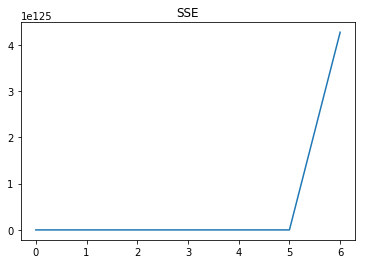

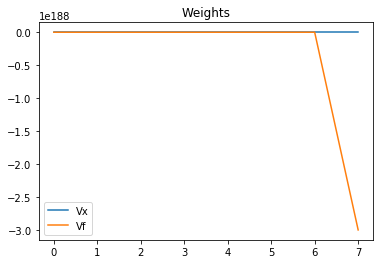

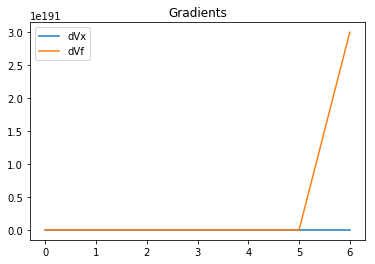

In [6]:
X, y = df.drop(columns='y').values, df['y'].values
train_X, test_X, train_y, test_y = X[:25], X[25:], y[:25], y[25:]

model = RNNAdder()
model.fit(train_X, train_y, nb_epoch=10)

In [7]:
model.predict(test_X, test_y)

Seq: [0 1 0 1 0 1 1 1] | y = 5 | y_hat = nan
Seq: [1 0 0 1 0 0 0 0] | y = 2 | y_hat = nan
Seq: [0 0 0 1 0 0 0 0] | y = 1 | y_hat = nan
Seq: [0 1 1 0 0 0 1 0] | y = 3 | y_hat = nan
Seq: [0 1 1 1 0 1 0 1] | y = 5 | y_hat = nan
MAE = nan


In [8]:
print(model.hist_Vf[:10])
print(model.hist_Vx[:10])

[0.9528460445963735, 0.9513543829370209, 0.9638147901549478, 0.899999239735475, 1.1145041297404106, -3.098785015706361, -155977364.48920166, -2.992484692064882e+188, nan, nan]
[1.1870432954697263, 1.183011699132197, 1.1824018114820465, 1.163763147168509, 1.2168592773619418, 0.4982602104941529, 114121.35974548988, 1.1674383470774145e+126, nan, nan]


In [9]:
print(model.hist_dVf[:10])
print(model.hist_dVx[:10])

[1.4916616593525842, -12.460407217926825, 63.81555041947273, -214.5048900049356, 4213.289145446772, 155977361390.41666, 2.9924846920648816e+191, nan, nan, nan]
[4.031596337529272, 0.6098876501505073, 18.63866431353743, -53.09613019343278, 718.5990668677888, -114120861.48527938, -1.1674383470774144e+129, nan, nan, nan]


Looking at the gradients, we can observe the exploding gradients problem. To avoid it, let's try to implement two other backpropagation algorithm.
## Resilient backpropagation

In [10]:
class ResilientRNNAdder(RNNAdder):
    
    def __init__(self):
        RNNAdder.__init__(self)
        
        # Delta weights
        self.delta_x = 0.001
        self.delta_f = 0.001
        
        # Learning rate limits
        self.max_delta = 50
        self.min_delta = 1e-6
        
        # Learning rate factors
        self.eta_p = 1.2
        self.eta_n = 0.5
        
    def find_lr_factor(self, grad, prev_grads):
        # If the list is empty (first iteration)
        if not prev_grads:
            return 1
        else:
            if grad * prev_grads[-1] > 0:
                return self.eta_p
            else:
                return self.eta_n
        
    def resilient_backward(self, X, y, y_hat):
        dVx = 0
        dVf = 0
        
        # Compute the same gradients
        for t in range(self.T):
            dVx += (np.sum((y_hat - y) * X[:, t]) * (self.Vf ** (self.T - t)))
            dVf += (np.sum((y_hat - y) * self.f[:, t - 1]) * (self.Vf ** (self.T - t)))
            
        # Update the deltas
        self.delta_x *= self.find_lr_factor(dVx, self.hist_dVx)
        self.delta_f *= self.find_lr_factor(dVf, self.hist_dVf)
        
        # Limit deltas
        if self.delta_x > self.max_delta:
            self.delta_x = self.max_delta
        elif self.delta_x < self.min_delta:
            self.delta_x = self.min_delta
        if self.delta_f > self.max_delta:
            self.delta_f = self.max_delta
        elif self.delta_f < self.min_delta:
            self.delta_f = self.min_delta
        
        # Update the weights
        self.Vx -= np.sign(dVx) * self.delta_x
        self.Vf -= np.sign(dVf) * self.delta_f
        
        self.hist_Vx.append(self.Vx)
        self.hist_Vf.append(self.Vf)
        
        self.hist_dVx.append(dVx)
        self.hist_dVf.append(dVf)
        
    def fit(self, X, y, nb_epoch=50):
        self.T = X.shape[1]
        
        for k in range(nb_epoch):
            y_hat = self.forward(X)

            self.err.append(self.compute_sse(y_hat, y))

            self.resilient_backward(X, y, y_hat)
            
        self.plot_hist()

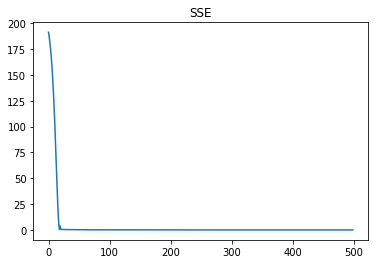

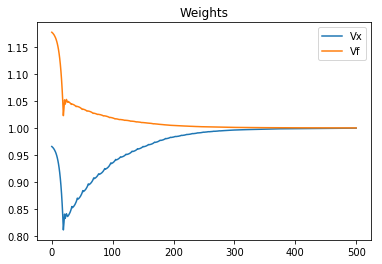

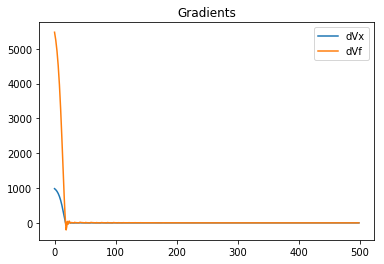

In [11]:
model = ResilientRNNAdder()
model.fit(train_X, train_y, nb_epoch=500)

In [12]:
print(model.hist_Vf[-15:])
print(model.hist_Vx[-15:])

[1.0001022034897133, 1.0000992175057133, 1.0001007104977133, 1.0000997104977134, 1.0000985104977134, 1.0000970704977135, 1.0000953424977135, 1.0000932688977135, 1.0000907805777135, 1.0000920247377134, 1.0000910247377135, 1.0000898247377135, 1.0000883847377136, 1.0000866567377136, 1.0000845831377136]
[0.9996254720309348, 0.9996317740935811, 0.9996393365687566, 0.9996484115389672, 0.9996593015032199, 0.9996538565210935, 0.9996565790121567, 0.9996598460014324, 0.9996637663885634, 0.9996684708531205, 0.9996741162105891, 0.9996808906395515, 0.9996890199543063, 0.999698775132012, 0.9996938975431592]


We can see that both gradients converge to **1**, which is a logical value to get a functionning adder.

Now let's try to predict the testing set to verify the result.

In [13]:
model.predict(test_X, test_y)

Seq: [0 1 0 1 0 1 1 1] | y = 5 | y_hat = 4.9995688892827905
Seq: [1 0 0 1 0 0 0 0] | y = 2 | y_hat = 2.0003181179297593
Seq: [0 0 0 1 0 0 0 0] | y = 1 | y_hat = 1.000032169444712
Seq: [0 1 1 0 0 0 1 0] | y = 3 | y_hat = 3.0000965584098465
Seq: [0 1 1 1 0 1 0 1] | y = 5 | y_hat = 4.999907189796443
MAE = 0.00019415334101688942


## Gradient Cliping 



In [60]:
class GradientClipping_RNNAdder(RNNAdder):
    
    def __init__(self):
        RNNAdder.__init__(self)
        
        # Learning rate
        self.lr_x = 0.001
        self.lr_f = 0.001
        
        self.clipvalue = 2.0
        
    def clipping_backward(self, X, y, y_hat):
        dVx = 0
        dVf = 0
        
        # Compute the same gradients
        for t in range(self.T):
            dVx += (np.sum((y_hat - y) * X[:, t]) * (self.Vf ** (self.T - t)))
            dVf += (np.sum((y_hat - y) * self.f[:, t - 1]) * (self.Vf ** (self.T - t)))
            
        # Limit deltas
        if dVx > self.clipvalue:
            dVx = self.clipvalue
        elif dVx < -self.clipvalue:
            dVx = -self.clipvalue
        if dVf > self.clipvalue:
            dVf = self.clipvalue
        elif dVf < -self.clipvalue:
            dVf = -self.clipvalue
           
        # Update the weights
        self.Vx -= dVx * self.lr_x
        self.Vf -= dVf * self.lr_f
        
        self.hist_Vx.append(self.Vx)
        self.hist_Vf.append(self.Vf)
        
        self.hist_dVx.append(dVx)
        self.hist_dVf.append(dVf)
        
    def fit(self, X, y, nb_epoch=50):
        self.T = X.shape[1]
        
        for k in range(nb_epoch):
            y_hat = self.forward(X)

            self.err.append(self.compute_sse(y_hat, y))

            self.clipping_backward(X, y, y_hat)
            
        self.plot_hist()

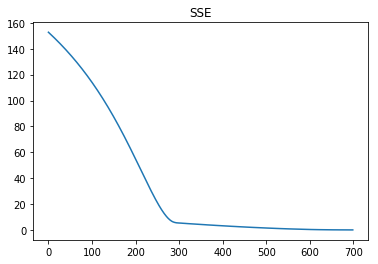

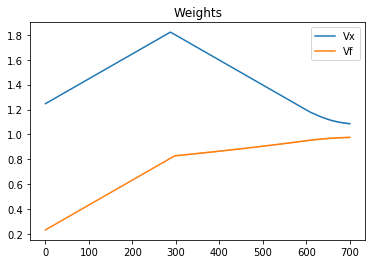

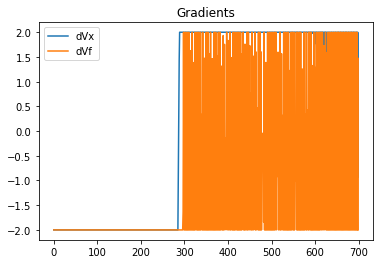

In [71]:
model = GradientClipping_RNNAdder()
model.fit(train_X, train_y, nb_epoch=700)

In [72]:
print(model.hist_Vf[-15:])
print(model.hist_Vx[-15:])

[0.9756193888718375, 0.9743388861380726, 0.9763388861380726, 0.9743388861380726, 0.9763388861380726, 0.9743388861380726, 0.9763388861380726, 0.9750332398723157, 0.9770332398723157, 0.9750332398723157, 0.9770332398723157, 0.9750332398723157, 0.9770332398723157, 0.9755525063253341, 0.9775525063253341]
[1.0936677113947304, 1.0916677113947304, 1.0922110888735774, 1.0902110888735774, 1.0913494115041642, 1.0893494115041642, 1.0908396789700474, 1.0888396789700474, 1.089482338093229, 1.087482338093229, 1.0886824414201977, 1.0866824414201977, 1.0882110530619347, 1.0862110530619347, 1.0871416503171847]


In [73]:
model.predict(test_X, test_y)

Seq: [0 1 0 1 0 1 1 1] | y = 5 | y_hat = 5.130222235398964
Seq: [1 0 0 1 0 0 0 0] | y = 2 | y_hat = 1.9201644714900938
Seq: [0 0 0 1 0 0 0 0] | y = 1 | y_hat = 0.9927651168003434
Seq: [0 1 1 0 0 0 1 0] | y = 3 | y_hat = 2.981913256946676
Seq: [0 1 1 1 0 1 0 1] | y = 5 | y_hat = 5.037964218521279
MAE = 0.05466872173662598
